In [21]:
import pandas as pd
# import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import re
import datetime

sns.set()

DATA_DIR = Path('../data/')
pd.set_option('max_columns', 999)

In [25]:
jan_17 = pd.read_csv('../data/calendar_2017-01-01.csv.gz', compression='gzip')
feb_17 = pd.read_csv('../data/calendar_2017-02-02.csv.gz', compression='gzip')
mar_17 = pd.read_csv('../data/calendar_2017-03-02.csv.gz', compression='gzip')
apr_17 = pd.read_csv('../data/calendar_2017-04-02.csv.gz', compression='gzip')
may_17 = pd.read_csv('../data/calendar_2017-05-02.csv.gz', compression='gzip')
jun_17 = pd.read_csv('../data/calendar_2017-06-02.csv.gz', compression='gzip')
jul_17 = pd.read_csv('../data/calendar_2017-07-02.csv.gz', compression='gzip')
aug_17 = pd.read_csv('../data/calendar_2017-08-02.csv.gz', compression='gzip')
sep_17 = pd.read_csv('../data/calendar_2017-09-02.csv.gz', compression='gzip')
oct_17 = pd.read_csv('../data/calendar_2017-10-02.csv.gz', compression='gzip')
nov_17 = pd.read_csv('../data/calendar_2017-11-01.csv.gz', compression='gzip')
dec_17 = pd.read_csv('../data/calendar_2017-12-02.csv.gz', compression='gzip')

jan_17_listing = pd.read_csv('../data/listings_2017-01-01.csv.gz', compression='gzip')
feb_17_listing = pd.read_csv('../data/listings_2017-02-02.csv.gz', compression='gzip')
mar_17_listing = pd.read_csv('../data/listings_2017-03-02.csv.gz', compression='gzip')
apr_17_listing = pd.read_csv('../data/listings_2017-04-02.csv.gz', compression='gzip')
may_17_listing = pd.read_csv('../data/listings_2017-05-02.csv.gz', compression='gzip')
jun_17_listing = pd.read_csv('../data/listings_2017-06-02.csv.gz', compression='gzip')
jul_17_listing = pd.read_csv('../data/listings_2017-07-02.csv.gz', compression='gzip')
aug_17_listing = pd.read_csv('../data/listings_2017-08-02.csv.gz', compression='gzip')
sep_17_listing = pd.read_csv('../data/listings_2017-09-02.csv.gz', compression='gzip')
oct_17_listing = pd.read_csv('../data/listings_2017-10-02.csv.gz', compression='gzip')
nov_17_listing = pd.read_csv('../data/listings_2017-11-01.csv.gz', compression='gzip')
dec_17_listing = pd.read_csv('../data/listings_2017-12-02.csv.gz', compression='gzip')

/Users/valerietan/miniconda2/envs/data100/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [31]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
cal = [jan_17, feb_17, mar_17, apr_17, may_17, jun_17, jul_17, aug_17, sep_17, oct_17, nov_17, dec_17]
list = [jan_17_listing, feb_17_listing, mar_17_listing, apr_17_listing, may_17_listing, jun_17_listing, 
        jul_17_listing, aug_17_listing, sep_17_listing, oct_17_listing, nov_17_listing, dec_17_listing]

In [32]:
def join_tables(cal, list):
    list = list[["id", "room_type"]]
    cal = cal.set_index("listing_id").join(list.set_index("id"))
    cal['price'] = (cal.loc[:, 'price']
                    .str.extract(r'\$(.*)', expand=False)
                    .str.replace(r',', '')
                    .astype(np.float_)
                   )
    cal = cal.groupby(['room_type']).mean()
    return cal

In [23]:
jan_clean = jan_17_listing[["id", "room_type"]]
jan_17_join = jan_17.set_index("listing_id").join(jan_clean.set_index("id"))
jan_17_entire = jan_17_join[jan_17_join["room_type"] == "Entire home/apt"]
jan_17_entire.head()
jan_17_join['price'] = (jan_17_join.loc[:, 'price']
                        .str.extract(r'\$(.*)', expand=False)
                        .str.replace(r',', '')
                        .astype(np.float_)
                       )
jan_agg = jan_17_join.groupby(['room_type']).mean()

In [77]:
for i in range(12):
    months[i] = join_tables(cal[i], list[i])
    months[i] = months[i].reset_index()

In [79]:
# jan.columns = ["room_type", "jan"]
# jan["feb"] = feb["price"]
# jan.head()
# temp = jan.join(feb.set_index("room_type"), how = "left")

all_months = months[0].copy()

for i in range(1, 12):
    all_months[i + 1] = months[i]["price"]

all_months.head()

,room_type,price,2,3,4,5,6,7,8,9,10,11,12
0,Entire home/apt,317.173805,323.332799,321.454639,324.222257,329.397631,343.049218,334.500068,337.596324,334.656442,337.703808,328.723335,313.676351
1,Private room,140.589391,140.569896,147.971061,146.075760,156.052798,171.770108,138.310984,144.484773,134.072574,139.886147,155.885706,134.662639
2,Shared room,138.864476,134.502616,109.822131,87.298230,85.987303,109.353346,107.099116,94.069246,93.343963,82.725451,113.454884,80.372612


In [80]:
all_months = all_months.rename(columns={"price": 1})

In [81]:
all_months.head()

,room_type,1,2,3,4,5,6,7,8,9,10,11,12
0,Entire home/apt,317.173805,323.332799,321.454639,324.222257,329.397631,343.049218,334.500068,337.596324,334.656442,337.703808,328.723335,313.676351
1,Private room,140.589391,140.569896,147.971061,146.075760,156.052798,171.770108,138.310984,144.484773,134.072574,139.886147,155.885706,134.662639
2,Shared room,138.864476,134.502616,109.822131,87.298230,85.987303,109.353346,107.099116,94.069246,93.343963,82.725451,113.454884,80.372612


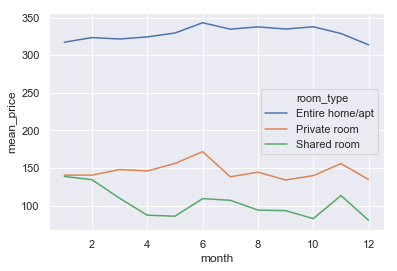

In [93]:
sns.lineplot(x='month', y='mean_price', hue='room_type',
    data=all_months.melt(id_vars='room_type').rename(columns={'variable':'month', 'value':'mean_price'})
)